In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os


## Alternative Splicing

In [2]:
df1 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df1 = pd.concat((df1,mean_df),ignore_index=True)
df1['Downsample factor'] = '1.0'

df5 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.5/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df5 = pd.concat((df5,mean_df),ignore_index=True)
df5['Downsample factor'] = '0.5'

df25 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/0.25/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df25 = pd.concat((df25,mean_df),ignore_index=True)
df25['Downsample factor'] = '0.25'
total_df = pd.concat((df1,df5,df25),ignore_index=True)
total_df.rename(columns={0:'Spearman rho'}, inplace=True)

In [3]:
df1 = df1.replace({'NT10_CNN': 'NT'})
df1 = df1.replace({'sei': 'SEI'})
df1 = df1.replace({'rbp': 'RBP'})
df1 = df1.replace({'DNABERT': 'DNABERT2'})
df1 = df1.replace({'CNN': 'One-hot'})

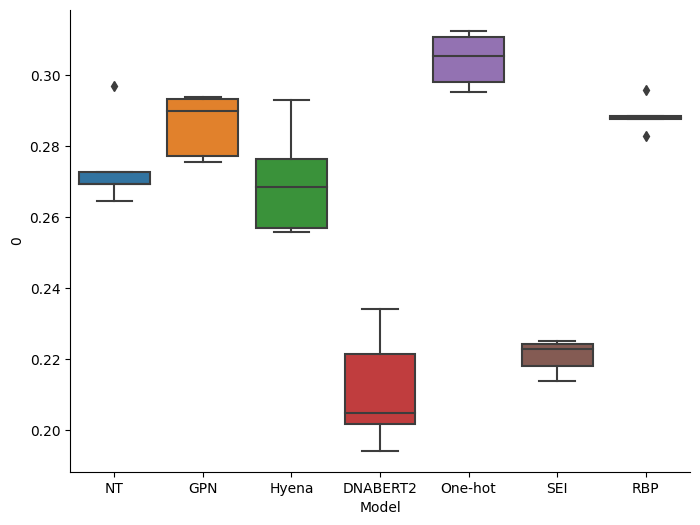

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(df1,x='Model',y=0,ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

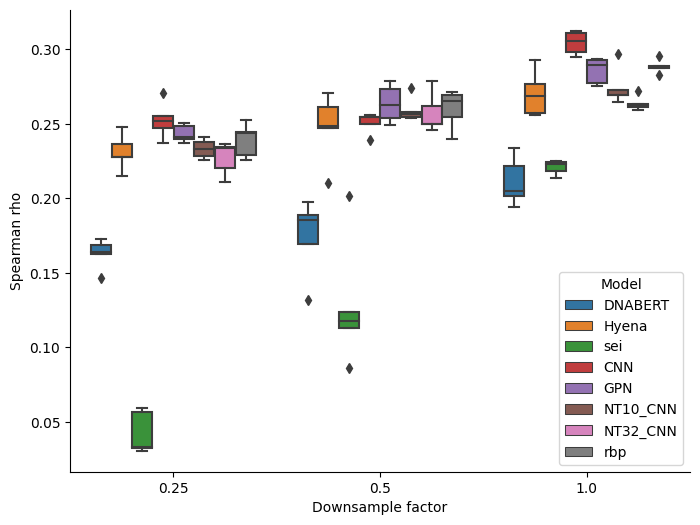

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(total_df,x='Downsample factor',y='Spearman rho',hue='Model',ax = ax,
            order = ['0.25','0.5','1.0'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## INSERT

In [6]:
import pickle as pkl
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.DataFrame()
for file in glob.glob('../RNAenlong/result/*.pkl'):
    with open(file, "rb") as input_file:
        df = pkl.load(input_file)
        df = df[df['Data Ratio'] == 1.0]
        df1 = pd.concat((df1,df),ignore_index=True)
    

In [8]:
df1 = df1.replace({'hyena_embed': 'Hyena'})
df1 = df1.replace({'sei_embed': 'SEI'})
df1 = df1.replace({'rbp_embed': 'RBP'})
df1 = df1.replace({'gpn_human_embed': 'GPN'})
df1 = df1.replace({'2B5_1000G_embed_l10': 'NT'})
df1 = df1.replace({'insert_dataset':'One-hot'})
df1 = df1.replace({'dnabert_embed': 'DNABERT2'})


Text(0.5, 0, 'Model')

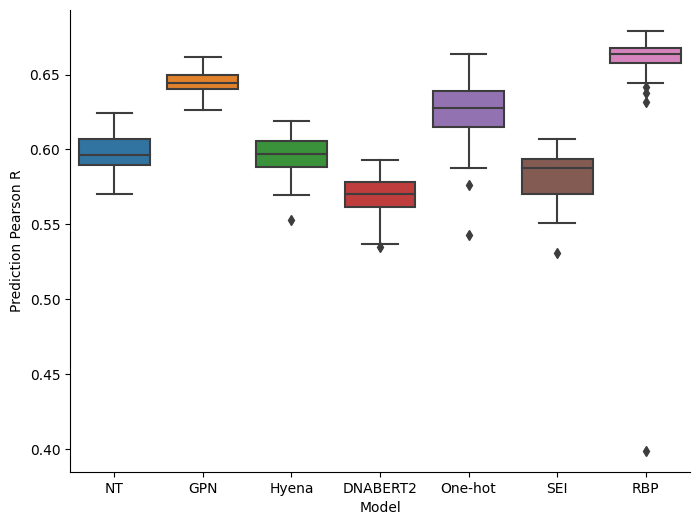

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(df1,x='Input Data',y= 'Prediction Pearson R', ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Model')

In [9]:
df1

,Data Ratio,Prediction Pearson R,Prediction MSE,Input Data
0,1.0,0.618939,0.190035,hyena_embed
1,1.0,0.591862,0.211993,hyena_embed
2,1.0,0.578182,0.211652,hyena_embed
3,1.0,0.553213,0.214285,hyena_embed
4,1.0,0.574298,0.208350,hyena_embed
...,...,...,...,...
445,1.0,0.663486,0.185152,insert_dataset
446,1.0,0.621505,0.198660,insert_dataset
447,1.0,0.638256,0.197702,insert_dataset
448,1.0,0.606519,0.204794,insert_dataset


## Chip/Clip

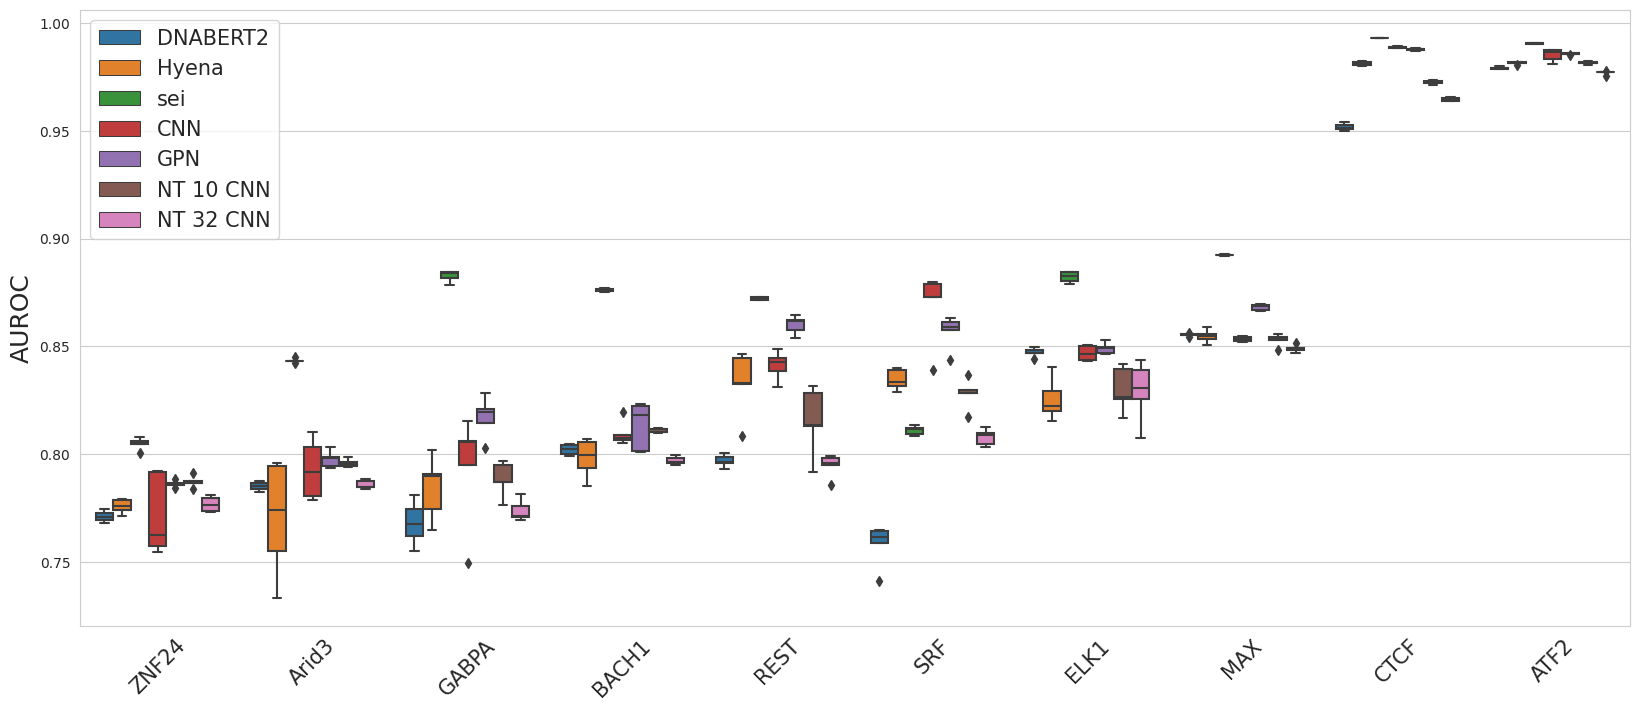

In [3]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/chip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
    sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(total_df,x='TF',y='AUROC',hue='Model',ax = ax,
order = ['ZNF24','Arid3','GABPA','BACH1','REST','SRF','ELK1','MAX','CTCF','ATF2'])
plt.ylabel('AUROC',size=18);
plt.xticks(rotation=45,size = 15);
plt.xlabel('');
plt.legend( prop={'size': 15});


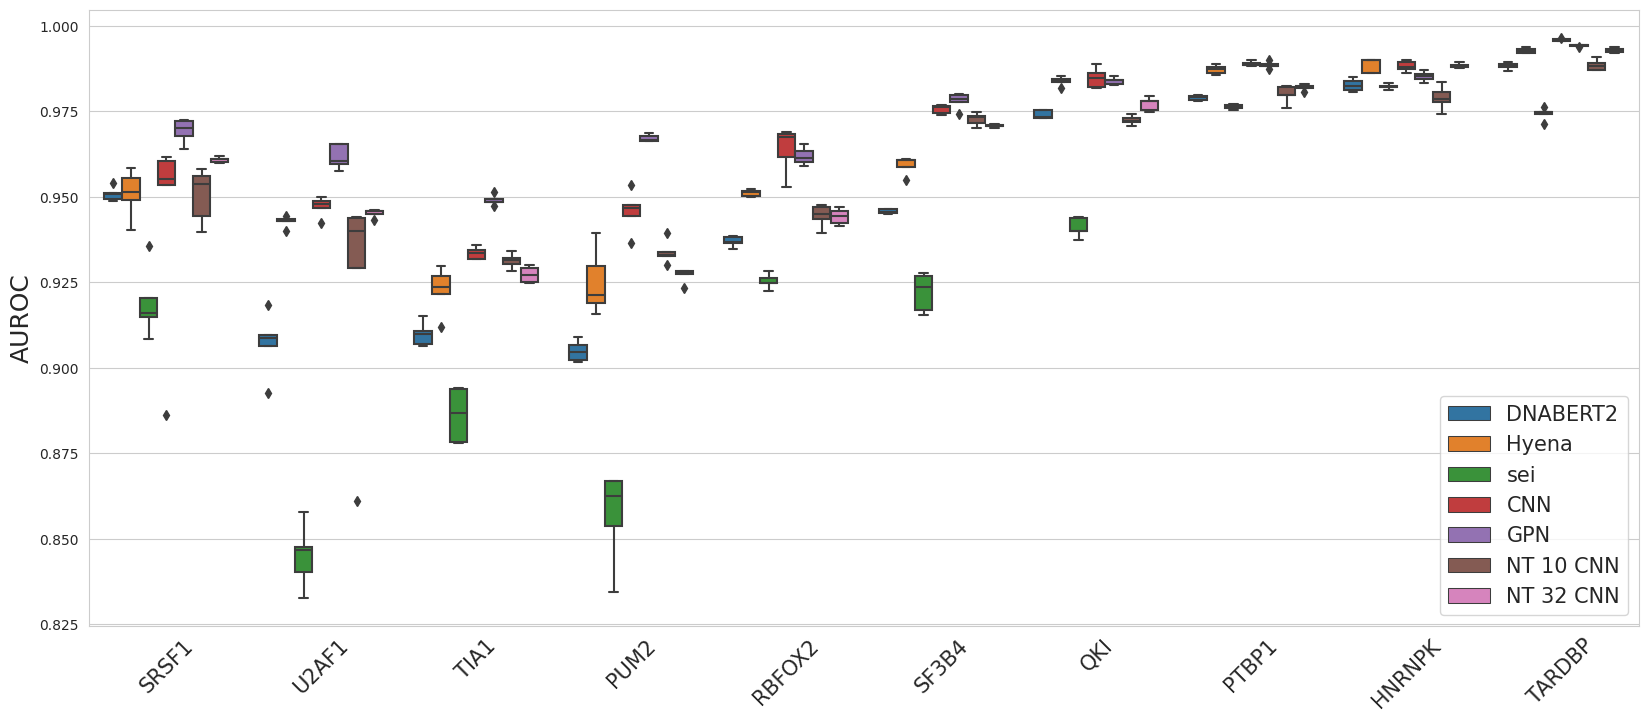

In [6]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/eclip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(total_df,x='TF',y='AUROC',hue='Model',ax = ax,
order = ['SRSF1','U2AF1','TIA1','PUM2','RBFOX2','SF3B4','QKI','PTBP1','HNRNPK','TARDBP'])
plt.ylabel('AUROC',size=18);
plt.xticks(rotation=45,size = 15);
plt.xlabel('');
plt.legend( prop={'size': 15});
